How to choose activation function : https://missinglink.ai/guides/neural-network-concepts/7-types-neural-network-activation-functions-right/

# MLP models for Binary Classification

A multi layer perceptron (MLP) is a class of feed forward artificial neural network. MLP consists of at least three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called back propagation for training.



**Basic Data Exploration**

**Label Encoding**
In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. ... Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form.

In [ ]:
import pandas as pd 
df = pd.read_csv('/content/bank-additional-full.csv',sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [ ]:
#Work on the Categorical Values 
df['job_code'] = LE.fit_transform(df['job'])
df['marital_code'] = LE.fit_transform(df['marital'])
df['education_code'] = LE.fit_transform(df['education'])
df['housing_code'] = LE.fit_transform(df['housing'])
df['loan_code'] = LE.fit_transform(df['loan'])
df['contact_code'] = LE.fit_transform(df['contact'])
df['poutcome_code'] = LE.fit_transform(df['poutcome'])
df['subscribed'] = LE.fit_transform(df['y'])

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_code,marital_code,education_code,housing_code,loan_code,contact_code,poutcome_code,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3,1,0,0,0,1,1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,7,1,3,0,0,1,1,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,7,1,3,2,0,1,1,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1,1,0,0,1,1,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,7,1,3,0,2,1,1,0


In [ ]:
df=df.drop(['job','marital','education','housing','loan','contact','poutcome','y','day_of_week','month','default']
             ,axis=1)


`** MLP Neural Network Model Creation**`

---



---



it is important that data is normalized before being fed into a model.We shall be using StandardScaler from scikit learn library along with MLP classifier for model creation.

**StandardScaler** standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. ...** StandardScaler** makes the mean of the distribution 0. About 68% of the values will lie be between -1 and 1.

X is input variable & y is output variable

In [ ]:
X=df.drop('subscribed',axis=1)
y= df['subscribed']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit the Training Data 
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

MLP classifier models take at least 3 layers . For simplicity sake we shall be taking 3 layers — ( 13 input, 10 hidden & 2 output) with maximum iterations of 100. This parameters can be fine tuned later on based on domain and data to improve the accuracy.

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(13,10,2),max_iter=100)
mlp.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(13, 10, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Confusion matrix

In [ ]:
predictions =mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[8735  366]
 [ 581  615]]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

90.80314654753812

# MLP models for Multiclass Classification

In this we are using Keras for Multiclass Classification on Iris Dataset.

Here we are importing Required Libraries

In [ ]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


Read Iris Dataset in which last Column is of Y(Output) and 0-3 of X(input)

In [ ]:
dataframe = pandas.read_csv("/content/iris.data", header=None)
dataset = dataframe.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

In [ ]:
dataframe.head()

Here we are using Label encoder

> Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form



In [ ]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

**Neural Network Model **

Here 4 inputs...8 hidden layer and 3 outputs

In [ ]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=4, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [ ]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)


In [ ]:
kfold = KFold(n_splits=10, shuffle=True)

In [ ]:
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 96.67% (3.33%)


# MLP for Regression

**Using Fuel dataset to predict Fuel Efficiency.

Import Libraries 

In [ ]:
!pip install -q git+https://github.com/tensorflow/docs

In [ ]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


First download the dataset using Keras

In [ ]:
dataset = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset

'/root/.keras/datasets/auto-mpg.data'

In [ ]:
columns = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
df = pd.read_csv(dataset, names=columns,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


**Preprocessing Of Dataset**

In [ ]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
df = df.dropna()

Here in the dataset we can see that Origin Column is not numeric so we need to use one hot encoder.

In [ ]:
df['Origin'] = df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [ ]:
df = pd.get_dummies(df, prefix='', prefix_sep='')
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


In [ ]:
train_df = df.sample(frac=0.8,random_state=0)
test_df = df.drop(train_df.index)

In [ ]:
train_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
146,28.0,4,90.0,75.0,2125.0,14.5,74,0,0,1
282,22.3,4,140.0,88.0,2890.0,17.3,79,0,0,1
69,12.0,8,350.0,160.0,4456.0,13.5,72,0,0,1
378,38.0,4,105.0,63.0,2125.0,14.7,82,0,0,1
331,33.8,4,97.0,67.0,2145.0,18.0,80,0,1,0


In [ ]:
test_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
9,15.0,8,390.0,190.0,3850.0,8.5,70,0,0,1
25,10.0,8,360.0,215.0,4615.0,14.0,70,0,0,1
28,9.0,8,304.0,193.0,4732.0,18.5,70,0,0,1
31,25.0,4,113.0,95.0,2228.0,14.0,71,0,1,0
33,19.0,6,232.0,100.0,2634.0,13.0,71,0,0,1


In [ ]:
train_stats = train_df.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [ ]:
train_labels = train_df.pop('MPG')
test_labels = test_df.pop('MPG')

Normalize  the dataset

In [ ]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
#normed_train_data = norm(train_df)
#normed_test_data = norm(test_df)

Build Model

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_df.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()

Model inspection

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
EPOCHS = 1000

history = model.fit(
  train_df, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:21883.0586,  mae:68.2273,  mse:21883.0586,  val_loss:182.6894,  val_mae:11.1875,  val_mse:182.6894,  
....................................................................................................
Epoch: 100, loss:602.7311,  mae:21.7222,  mse:602.7311,  val_loss:592.3028,  val_mae:23.3688,  val_mse:592.3028,  
....................................................................................................
Epoch: 200, loss:188.4727,  mae:12.0320,  mse:188.4727,  val_loss:36.8875,  val_mae:4.6434,  val_mse:36.8875,  
....................................................................................................
Epoch: 300, loss:116.5437,  mae:9.5996,  mse:116.5437,  val_loss:42.3669,  val_mae:5.6950,  val_mse:42.3669,  
....................................................................................................
Epoch: 400, loss:44.2416,  mae:5.6778,  mse:44.2416,  val_loss:86.3313,  val_mae:8.0976,  val_mse:86.3313,  
...............................

Visualize the model's training progress using the stats stored in the history object.

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,21883.058594,68.227280,21883.058594,182.689377,11.187451,182.689377,0
1,225.475143,12.270948,225.475143,148.046158,9.745820,148.046158,1
2,483.255280,16.653059,483.255280,5006.655762,69.749817,5006.655762,2
3,4289.326172,57.784199,4289.326172,215.934174,12.541338,215.934174,3
4,568.027466,20.567749,568.027466,1412.059570,37.029633,1412.059570,4


Finally, predict MPG values using data in the testing set:

test_predictions :  [14.153587  13.269697  14.5003395 27.187983  19.473936  14.167958
 14.92987   14.074026  19.17569   32.90901   30.026352  22.336386
 15.284159  29.21209   15.365509  15.713199  16.363825  14.612578
 20.618412  14.096133  14.143582  29.870035  20.994135  22.686596
 35.96519   27.115788  18.812538  26.428005  19.88822   19.966284
 33.498158  23.280846  21.449938  23.65768   31.78924   16.103863
 22.349798  36.28486   34.587353  20.833113  36.39922   34.486744
 16.936146  38.031925  34.131508  38.569733  23.878584  24.173304
 17.94437   28.667925  33.38424   23.01231   36.725567  18.534267
 18.218939  18.214449  36.209686  38.64631   23.725874  26.240988
 38.260185  36.24579   29.546621  27.685076  32.673515  37.27824
 39.15424   38.27052   35.72186   30.340893  23.202486  21.403172
 31.78174   34.267017  35.819344  38.4188    39.317078  31.79276  ]


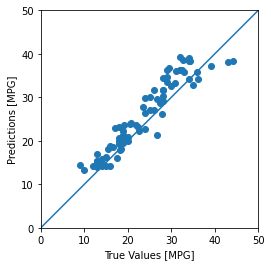

In [ ]:
test_predictions = model.predict(test_df).flatten()
print("test_predictions : ", test_predictions)
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

# Convolutional Network Models for image classification.

There are many techniques to implement CNN for image classification like : 


1.   AlexNet : One of the reasons AlexNet managed to significantly reduce the average classification rate is its use of faster ReLU for the non-linear part instead of traditional, slower solutions such as Tanh or Sigmond functions.
2.   GoogleNet : The architecture of GoogleNet is 22 layers deep. The team implemented a module they designed called “inception module” to reduce the number of parameters by using batch normalization, RMSprop and image distortions. GoogleNet only has 4 million parameters, a major leap compared to the 60 million parameters of AlexNet.
3. ResNet : ResNet can have up to 152 layers. It uses “skip connections” (also known as gated units) to jump over certain layers in the process and introduces heavy batch normalization. The smart implementation of the architecture of ResNet allows it to have about 6 times more layers than GoogleNet with less complexity.




Here we are using the popular MNIST dataset, this dataset contains handwritten digits.

In [ ]:
from keras.datasets import mnist

# loading the dataset
# here we devided the dataset into train-test data and labels. where x is for data and y is for labels
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


lets see the shape of the data

In [ ]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


We know that every coloured image have 3 and black&white image have 2 dimensions.

Before we train a CNN model, let’s build a basic Fully Connected Neural Network for the dataset. The basic steps to build an image classification model using a neural network are:

Flatten the input image dimensions to 1D (width pixels x height pixels)
Normalize the image pixel values (divide by 255)
One-Hot Encode the categorical column
Build a model architecture (Sequential) with Dense layers
Train the model and make predictions
Here’s how you can build a neural network model for MNIST. I have commented on the relevant parts of the code

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from keras.utils import np_utils

In [ ]:
# Flattening the images from the 28x28 pixels to 1D 787 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

this step is not so necessary

In [ ]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [ ]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()
# hidden layer
model.add(Dense(100, input_shape=(784,), activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

# looking at the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.3755 - accuracy: 0.8981 - val_loss: 0.1973 - val_accuracy: 0.9440
Epoch 2/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.1704 - accuracy: 0.9517 - val_loss: 0.1440 - val_accuracy: 0.9591
Epoch 3/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.1239 - accuracy: 0.9641 - val_loss: 0.1152 - val_accuracy: 0.9681
Epoch 4/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.0994 - accuracy: 0.9714 - val_loss: 0.1071 - val_accuracy: 0.9680
Epoch 5/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.0813 - accuracy: 0.9767 - val_loss: 0.0904 - val_accuracy: 0.9724
Epoch 6/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.0693 - accuracy: 0.9801 - val_loss: 0.0828 - val_accuracy: 0.9755
Epoch 7/10
60000/60000 [==============================] - 2s 30us/st

In [ ]:
model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 0s 26us/step


[0.07791864555533976, 0.9771000146865845]

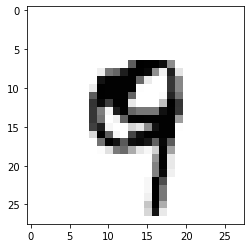

In [ ]:
import matplotlib.pyplot as plt

image_index = 4444
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')


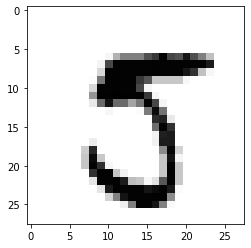

In [ ]:
image_index = 570
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')

# Recurrent Neural Networks (RNNs) for LSTM
https://towardsdatascience.com/understanding-rnn-and-lstm-f7cdf6dfc14e

What is internal state memory of RNN ?

LSTM is basically used for Time Series data analysis


1.   Here we are using LSTM architecture for regression




---



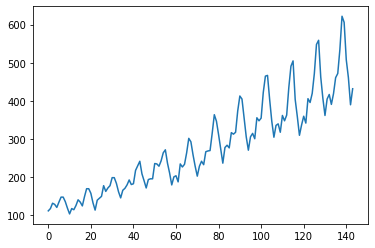

In [1]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('/content/passengers.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [3]:
dataset = dataset.values
dataset = dataset.astype('float32')

In [4]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [5]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [6]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [7]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [8]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [9]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0313
Epoch 2/100
 - 0s - loss: 0.0144
Epoch 3/100
 - 0s - loss: 0.0117
Epoch 4/100
 - 0s - loss: 0.0107
Epoch 5/100
 - 0s - loss: 0.0098
Epoch 6/100
 - 0s - loss: 0.0089
Epoch 7/100
 - 0s - loss: 0.0080
Epoch 8/100
 - 0s - loss: 0.0071
Epoch 9/100
 - 0s - loss: 0.0062
Epoch 10/100
 - 0s - loss: 0.0054
Epoch 11/100
 - 0s - loss: 0.0047
Epoch 12/100
 - 0s - loss: 0.0041
Epoch 13/100
 - 0s - loss: 0.0035
Epoch 14/100
 - 0s - loss: 0.0031
Epoch 15/100
 - 0s - loss: 0.0027
Epoch 16/100
 - 0s - loss: 0.0025
Epoch 17/100
 - 0s - loss: 0.0023
Epoch 18/100
 - 0s - loss: 0.0022
Epoch 19/100
 - 0s - loss: 0.0021
Epoch 20/100
 - 0s - loss: 0.0021
Epoch 21/100
 - 0s - loss: 0.0021
Epoch 22/100
 - 0s - loss: 0.0021
Epoch 23/100
 - 0s - loss: 0.0020
Epoch 24/100
 - 0s - loss: 0.0020
Epoch 25/100
 - 0s - loss: 0.0020
Epoch 26/100
 - 0s - loss: 0.0020
Epoch 27/100
 - 0s - loss: 0.0020
Epoch 28/100
 - 0s - loss: 0.0020
Epoch 29/100
 - 0s - loss: 0.0020
Epoch 30/100
 - 0s - lo

In [10]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.40 RMSE
Test Score: 51.49 RMSE


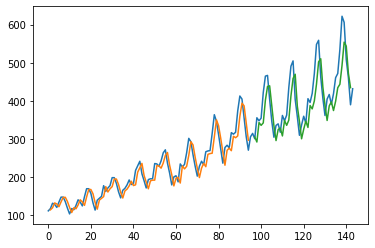

In [11]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Basic Autoencoders using Keras

In [12]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [13]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [14]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [15]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [16]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [19]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [20]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256)

Epoch 1/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.3627
Epoch 2/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.2622
Epoch 3/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.2391
Epoch 4/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.2184
Epoch 5/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.2038
Epoch 6/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.1935
Epoch 7/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.1854
Epoch 8/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.1785
Epoch 9/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.1724
Epoch 10/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.1670
Epoch 11/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.1622
Epoch 12/50
60000/60000 [===========================

In [23]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

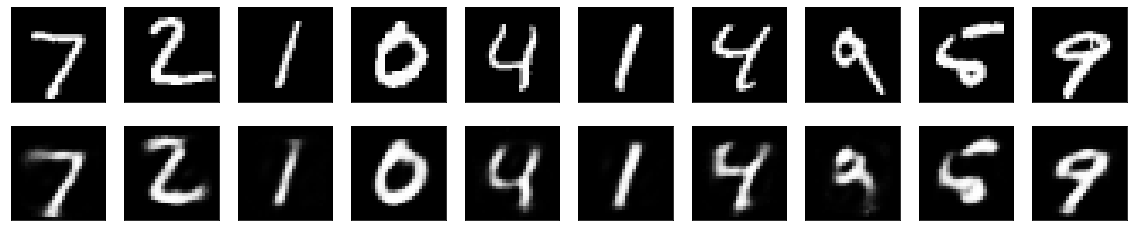

In [24]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
#top row is of original
#second row is of predicted.